In [1]:
import matplotlib.pyplot as plt

from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv import utils
from gluoncv.model_zoo import get_model

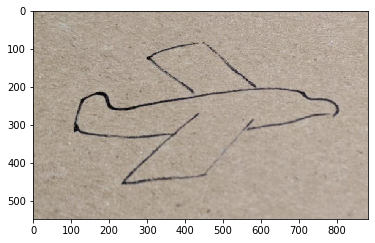

In [2]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/plane-draw.jpeg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [3]:
transform_fn = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


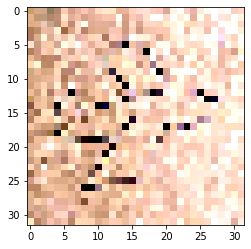

In [4]:
img = transform_fn(img)
plt.imshow(nd.transpose(img, (1,2,0)).asnumpy())
plt.show()

In [5]:
net = get_model('cifar_resnet110_v1', classes=10, pretrained=True)

In [6]:
pred = net(img.expand_dims(axis=0))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
ind = nd.argmax(pred, axis=1).astype('int')
print('The input picture is classified as [%s], with probability %.3f.'%
      (class_names[ind.asscalar()], nd.softmax(pred)[0][ind].asscalar()))

The input picture is classified as [airplane], with probability 0.392.
